# Homework 01 Data Pre-processing

#### Loading the Diabetes Dataset

In [86]:
import pandas as pd 
from sklearn.datasets import load_breast_cancer
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, PowerTransformer

#Load the Diabetes dataset
dataset = load_breast_cancer()


#### Exploring the Dataset

In [87]:
x_full, y_full = dataset.data, dataset.target

#Access the feature names
feature_names = dataset.feature_names

# Define the target variable name
target = dataset.target
target_name = dataset.target_names

# Print the name of the target variable
print("target_names")
print(target_name)
# Print the feature names
print("Feature Names:")
print(feature_names)

target_names
['malignant' 'benign']
Feature Names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


#### Selecting Features

In [88]:
X = pd.DataFrame(dataset.data, columns=dataset.feature_names)

# Get descriptive statistics
summary = df.describe(percentiles=[0.25, 0.75]).T
summary["variance"] = df.var()
print(summary[["mean", "variance", "25%", "75%"]])

                               mean       variance         25%          75%
mean radius               14.127292      12.418920   11.700000    15.780000
mean texture              19.289649      18.498909   16.170000    21.800000
mean perimeter            91.969033     590.440480   75.170000   104.100000
mean area                654.889104  123843.554318  420.300000   782.700000
mean smoothness            0.096360       0.000198    0.086370     0.105300
mean compactness           0.104341       0.002789    0.064920     0.130400
mean concavity             0.088799       0.006355    0.029560     0.130700
mean concave points        0.048919       0.001506    0.020310     0.074000
mean symmetry              0.181162       0.000752    0.161900     0.195700
mean fractal dimension     0.062798       0.000050    0.057700     0.066120
radius error               0.405172       0.076902    0.232400     0.478900
texture error              1.216853       0.304316    0.833900     1.474000
perimeter er

Considering the above results mean area and worst area are selected as the two features for further preprocessing.

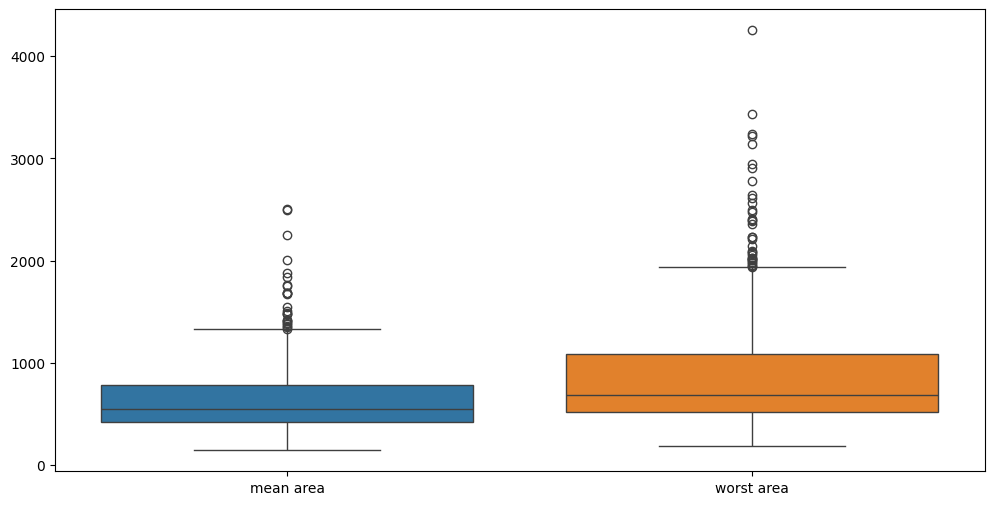

In [89]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[['mean area', 'worst area']])
plt.show()

#### Applying Different Data Normalization Methods

##### Min-Max Scaling

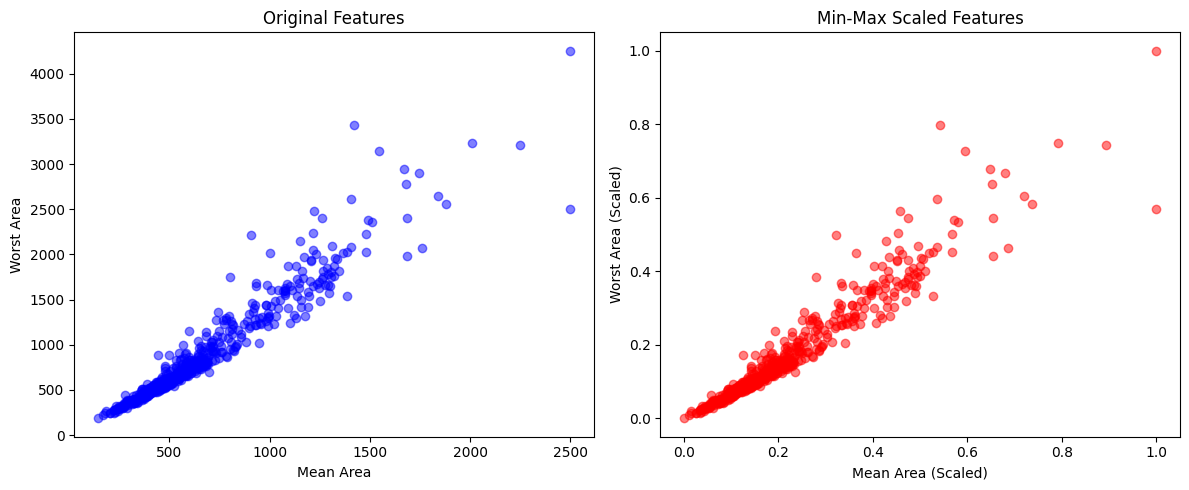

In [90]:
# Suppose these are the selected features
features_selected = X[['mean area', 'worst area']]

# 1. Min-Max Scaling
minmax = MinMaxScaler()
X_minmax = minmax.fit_transform(features_selected)

# Correct DataFrame creation
X_minmax = pd.DataFrame(X_minmax, columns=['mean area', 'worst area'])

plt.figure(figsize=(12,5))

# Original features
plt.subplot(1, 2, 1)
plt.scatter(X['mean area'], X['worst area'], color='blue', alpha=0.5)
plt.xlabel('Mean Area')
plt.ylabel('Worst Area')
plt.title('Original Features')

# Scaled features
plt.subplot(1, 2, 2)
plt.scatter(X_minmax['mean area'], X_minmax['worst area'], color='red', alpha=0.5)
plt.xlabel('Mean Area (Scaled)')
plt.ylabel('Worst Area (Scaled)')
plt.title('Min-Max Scaled Features')

plt.tight_layout()
plt.show()

##### Standard Scaling

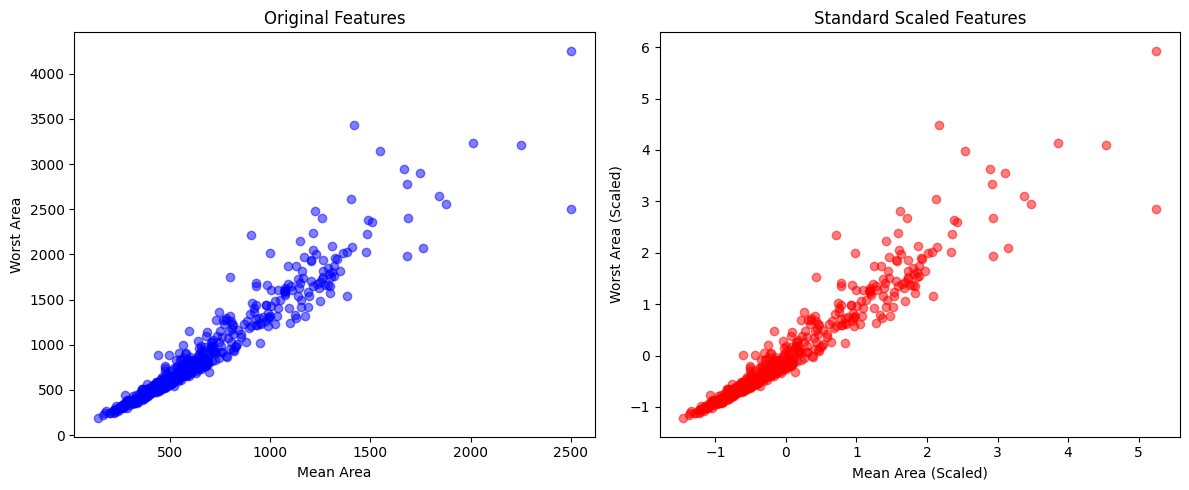

In [91]:
# 2. Standard Scaling
standard = StandardScaler()
X_standard = standard.fit_transform(features_selected)

X_standard = pd.DataFrame(X_standard, columns=['mean area', 'worst area'])

plt.figure(figsize=(12,5))

# Original features
plt.subplot(1, 2, 1)
plt.scatter(X['mean area'], X['worst area'], color='blue', alpha=0.5)
plt.xlabel('Mean Area')
plt.ylabel('Worst Area')
plt.title('Original Features')

# Scaled features
plt.subplot(1, 2, 2)
plt.scatter(X_standard['mean area'], X_standard['worst area'], color='red', alpha=0.5)
plt.xlabel('Mean Area (Scaled)')
plt.ylabel('Worst Area (Scaled)')
plt.title('Standard Scaled Features')

plt.tight_layout()
plt.show()

##### Robust Scaling

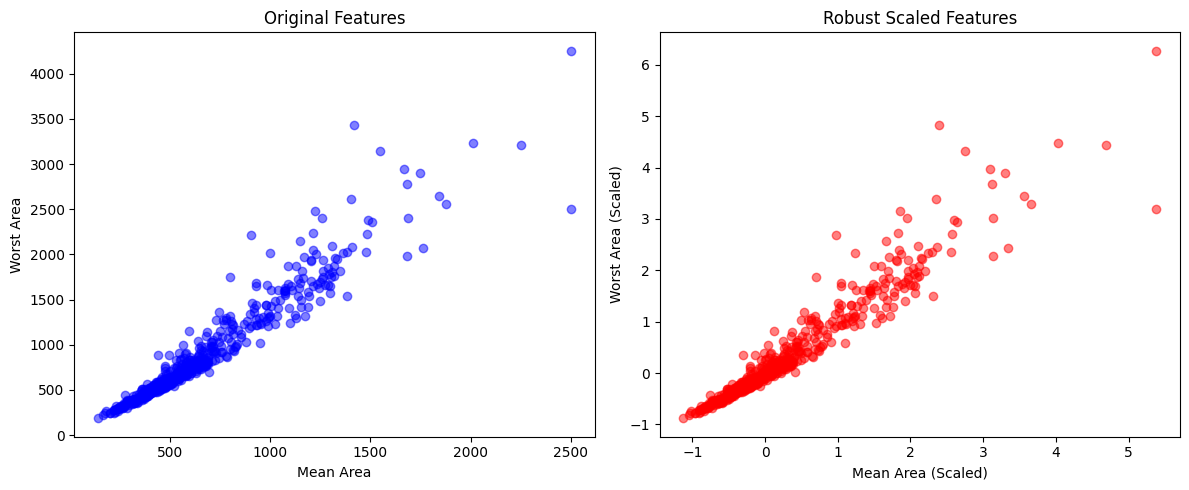

In [92]:
# 2. Robust Scaling
robust = RobustScaler()
X_robust = robust.fit_transform(features_selected)

X_robust = pd.DataFrame(X_robust, columns=['mean area', 'worst area'])

plt.figure(figsize=(12,5))

# Original features
plt.subplot(1, 2, 1)
plt.scatter(X['mean area'], X['worst area'], color='blue', alpha=0.5)
plt.xlabel('Mean Area')
plt.ylabel('Worst Area')
plt.title('Original Features')

# Scaled features
plt.subplot(1, 2, 2)
plt.scatter(X_robust['mean area'], X_robust['worst area'], color='red', alpha=0.5)
plt.xlabel('Mean Area (Scaled)')
plt.ylabel('Worst Area (Scaled)')
plt.title('Robust Scaled Features')

plt.tight_layout()
plt.show()

##### Power Transformer

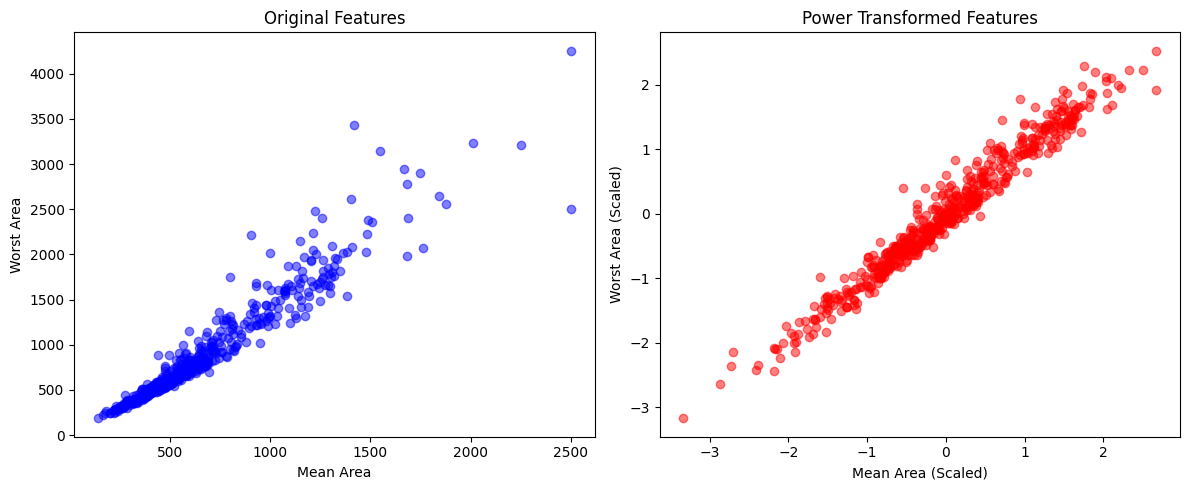

In [93]:
# 3. Power Transformer
power = PowerTransformer()
X_power = power.fit_transform(features_selected)

X_power = pd.DataFrame(X_power, columns=['mean area', 'worst area'])

plt.figure(figsize=(12,5))

# Original features
plt.subplot(1, 2, 1)
plt.scatter(X['mean area'], X['worst area'], color='blue', alpha=0.5)
plt.xlabel('Mean Area')
plt.ylabel('Worst Area')
plt.title('Original Features')

# Scaled features
plt.subplot(1, 2, 2)
plt.scatter(X_power['mean area'], X_power['worst area'], color='red', alpha=0.5)
plt.xlabel('Mean Area (Scaled)')
plt.ylabel('Worst Area (Scaled)')
plt.title('Power Transformed Features')

plt.tight_layout()
plt.show()

#### Comparison of Normalization Methods and Their Impact on Outliers

---

##### 1. Min-Max Scaling (`MinMaxScaler`)
- **How it works:** Scales features to a fixed range, usually [0,1].
  \[
  X_{\text{scaled}} = \frac{X - X_{\min}}{X_{\max} - X_{\min}}
  \]
- **Impact on data:**
  - Preserves the shape of the original distribution.
  - All features are scaled proportionally.
- **Impact on outliers:**
  - Outliers are **not robustly handled**; extreme values compress the scale for normal points.
  - Example: One huge outlier makes most of the other data points squeezed near 0.
- **Best use:** When data has a known range and few outliers.

##### 2. Standard Scaling (`StandardScaler`)
- **How it works:** Centers data to mean 0 and scales by standard deviation (unit variance).
  \[
  X_{\text{scaled}} = \frac{X - \mu}{\sigma}
  \]
- **Impact on data:**
  - Makes features comparable in terms of variance.
  - Preserves distribution shape but centers it.
- **Impact on outliers:**
  - Sensitive to outliers because the mean and standard deviation are affected.
  - Extreme points can stretch the scale.
- **Best use:** When algorithms assume normally distributed data (e.g., PCA, logistic regression).

##### 3. Robust Scaling (`RobustScaler`)
- **How it works:** Uses median and interquartile range (IQR) instead of mean and standard deviation.
  \[
  X_{\text{scaled}} = \frac{X - \text{median}}{\text{IQR}}
  \]
- **Impact on data:**
  - Less sensitive to extreme values.
  - Centers the median at 0 and scales based on spread of middle 50% of data.
- **Impact on outliers:**
  - Very robust; outliers have minimal influence.
- **Best use:** When data has **significant outliers** or heavy-tailed distributions.

##### 4. Power Transform (`PowerTransformer`)
- **How it works:** Applies a power function to make data more Gaussian-like (reduces skewness).
  - **Yeo-Johnson:** works with positive & negative values.
  - **Box-Cox:** works with strictly positive values.
- **Impact on data:**
  - Changes the shape of distribution, not just scale.
  - Reduces skewness, stabilizes variance.
- **Impact on outliers:**
  - Compresses extreme values, making outliers **less extreme**.
  - Still keeps the relative order of data points.
- **Best use:** When you want **normal-like data** for algorithms sensitive to distribution (e.g., linear regression, PCA, clustering).

---

##### Summary 

| Method | Effect on Scale | Effect on Distribution | Robust to Outliers? |
|--------|----------------|----------------------|-------------------|
| Min-Max | [0,1] scaling | Preserves shape | No |
| Standard | Mean=0, SD=1 | Preserves shape | No |
| Robust | Median=0, scaled by IQR | Preserves shape | Yes |
| Power Transform | Changes shape toward Gaussian | Reduces skew | Moderate (reduces extreme impact) |

---

##### Interpretation
- Min-Max Scaling: Good for bounded data and visualization but very sensitive to outliers.  
- Standard Scaling: Useful for algorithms requiring zero mean/unit variance but still affected by extreme values.  
- Robust Scaling: Ideal for datasets with outliers; median & IQR prevent extreme values from distorting scaling.  
- Power Transform: Good for skewed distributions; also reduces the impact of outliers, but may not fully eliminate them.


